# Explore scores csv file

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data
scores = pd.read_csv('../data/depresjon/scores.csv')
scores['condition'] = scores['number'].str.split("_").str.get(0) # add condition column
scores["gender"].replace({1: "female", 2: "male"}, inplace=True) # re-label gender

# order age
age_order = ["20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69"] 
scores['age'] = pd.Categorical(scores['age'], categories=age_order, ordered=True)

In [63]:
#scores['age'].unique()

array(['35-39', '40-44', '45-49', '25-29', '50-54', '20-24', '60-64',
       '55-59', '30-34', '65-69'], dtype=object)

In [4]:
# look at data
print(scores.head(10))

         number  days  gender    age  afftype  melanch  inpatient    edu  \
0   condition_1    11    male  35-39      2.0      2.0        2.0   6-10   
1   condition_2    18    male  40-44      1.0      2.0        2.0   6-10   
2   condition_3    13  female  45-49      2.0      2.0        2.0   6-10   
3   condition_4    13    male  25-29      2.0      2.0        2.0  11-15   
4   condition_5    13    male  50-54      2.0      2.0        2.0  11-15   
5   condition_6     7  female  35-39      2.0      2.0        2.0   6-10   
6   condition_7    11  female  20-24      1.0      NaN        2.0  11-15   
7   condition_8     5    male  25-29      2.0      NaN        2.0  11-15   
8   condition_9    13    male  45-49      1.0      NaN        2.0   6-10   
9  condition_10     9    male  45-49      2.0      2.0        2.0   6-10   

   marriage  work  madrs1  madrs2  condition  
0       1.0   2.0    19.0    19.0  condition  
1       2.0   2.0    24.0    11.0  condition  
2       2.0   2.0    2

## Details about dataset

From: https://datasets.simula.no/depresjon/

The dataset contains the following: Two folders, whereas one contains the data for the controls and one for the condition group. For each patient we provide a csv file containing the actigraph data collected over time. The columns are: timestamp (one minute intervals), date (date of measurement), activity (activity measurement from the actigraph watch). In addition, we also provide the MADRS scores in the file \emph{scores.csv}. 

It contains the following columns; number (patient identifier), days (number of days of measurements), gender (1 or 2 for female or male), age (age in age groups), afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), melanch (1: melancholia, 2: no melancholia), inpatient (1: inpatient, 2: outpatient), edu (education grouped in years), marriage (1: married or cohabiting, 2: single), work (1: working or studying, 2: unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped).


### Missing values

**Observations**

* additional depression data is only for `condition` participants - separate EDA later
* some missing values for `melanch` and `edu`

In [5]:
# columns, missing values, datatype
print(scores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   number     55 non-null     object  
 1   days       55 non-null     int64   
 2   gender     55 non-null     object  
 3   age        55 non-null     category
 4   afftype    23 non-null     float64 
 5   melanch    20 non-null     float64 
 6   inpatient  23 non-null     float64 
 7   edu        53 non-null     object  
 8   marriage   23 non-null     float64 
 9   work       23 non-null     float64 
 10  madrs1     23 non-null     float64 
 11  madrs2     23 non-null     float64 
 12  condition  55 non-null     object  
dtypes: category(1), float64(7), int64(1), object(4)
memory usage: 5.7+ KB
None


In [8]:
# missing values
print(scores.isna().sum())

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64


### Categorical columns


In [9]:
# counts
print(scores.value_counts('edu',))
print(scores.value_counts('age'))

edu
         31
6-10     12
11-15     8
16-20     2
Name: count, dtype: int64
age
45-49    9
50-54    9
25-29    7
30-34    7
35-39    7
20-24    6
40-44    5
60-64    2
65-69    2
55-59    1
Name: count, dtype: int64


### Numerical columns

**Observations**
* days - range is 5-20, but mean is 12.  may need to drop participants or reduce data?
* MADRS average reduced

In [9]:
# numerical columns
print(scores.describe())

            days     gender    afftype    melanch  inpatient   marriage  \
count  55.000000  55.000000  23.000000  20.000000  23.000000  23.000000   
mean   12.600000   1.454545   1.739130   1.950000   1.782609   1.521739   
std     2.491467   0.502519   0.540824   0.223607   0.421741   0.510754   
min     5.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%    13.000000   1.000000   1.000000   2.000000   2.000000   1.000000   
50%    13.000000   1.000000   2.000000   2.000000   2.000000   2.000000   
75%    13.000000   2.000000   2.000000   2.000000   2.000000   2.000000   
max    20.000000   2.000000   3.000000   2.000000   2.000000   2.000000   

            work     madrs1     madrs2  
count  23.000000  23.000000  23.000000  
mean    1.869565  22.739130  20.000000  
std     0.344350   4.797892   4.729021  
min     1.000000  13.000000  11.000000  
25%     2.000000  18.500000  16.000000  
50%     2.000000  24.000000  21.000000  
75%     2.000000  26.000000  24.50000

### Visualisation



#### Days

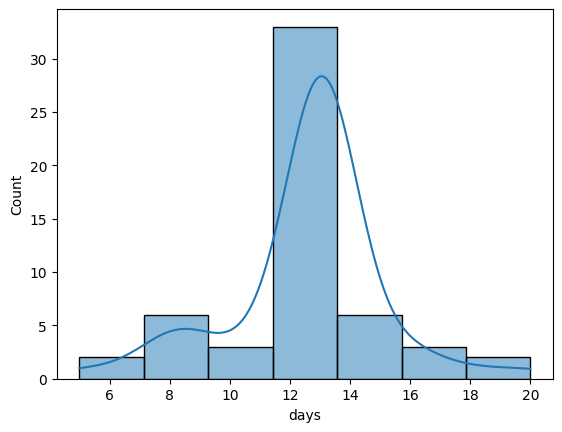

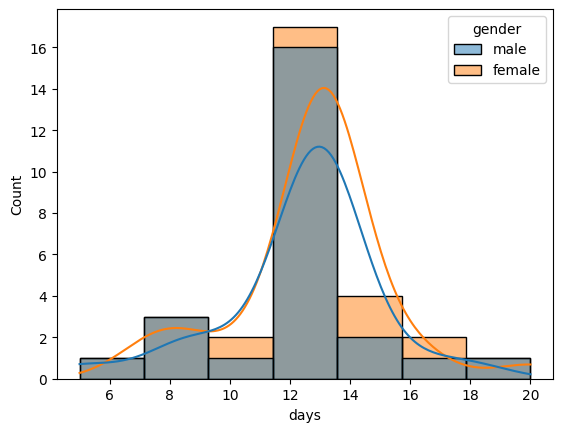

In [10]:
# days distribution
#sns.histplot(data = scores, x = 'days', hue='condition')
#plt.tight_layout()
#plt.show()

# overall days distribution
sns.histplot(scores["days"], kde=True)
plt.show()

# days distribution by gender
sns.histplot(x="days", hue="gender", kde=True, data=scores)
plt.show()


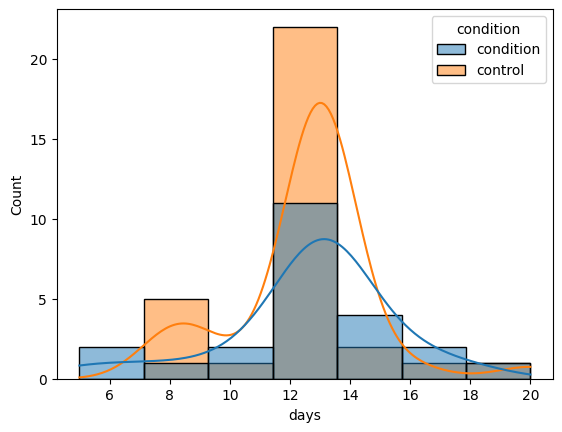

In [13]:

# days distribution by condition
sns.histplot(x="days", hue="condition", kde=True, data=scores)
plt.show()


#### Gender 

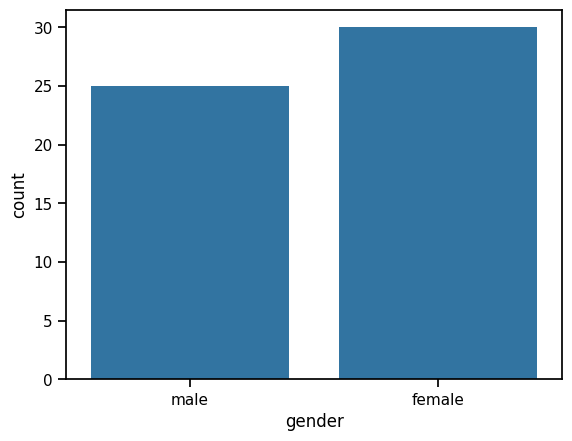

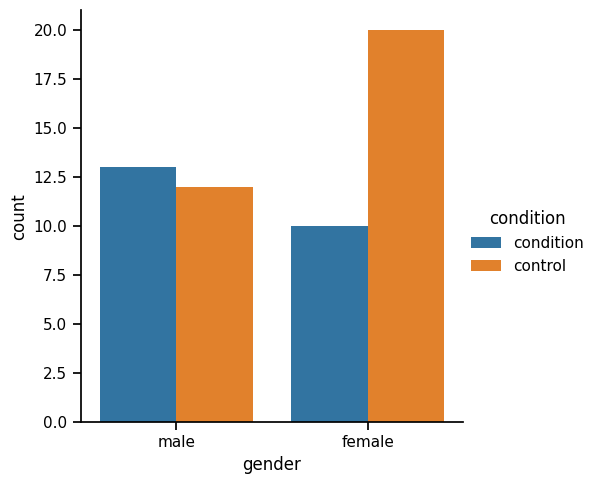

In [42]:

# overall gender balance
sns.countplot(x="gender", data=scores)
plt.show()

# gender balance by condition
sns.catplot(x="gender", hue="condition", kind="count", data=scores)
plt.show()



#### Exploring 'Depressed' only



In [26]:
# create depressed df
condition_df = scores[scores["condition"] == "condition"]


#### MADRS scores

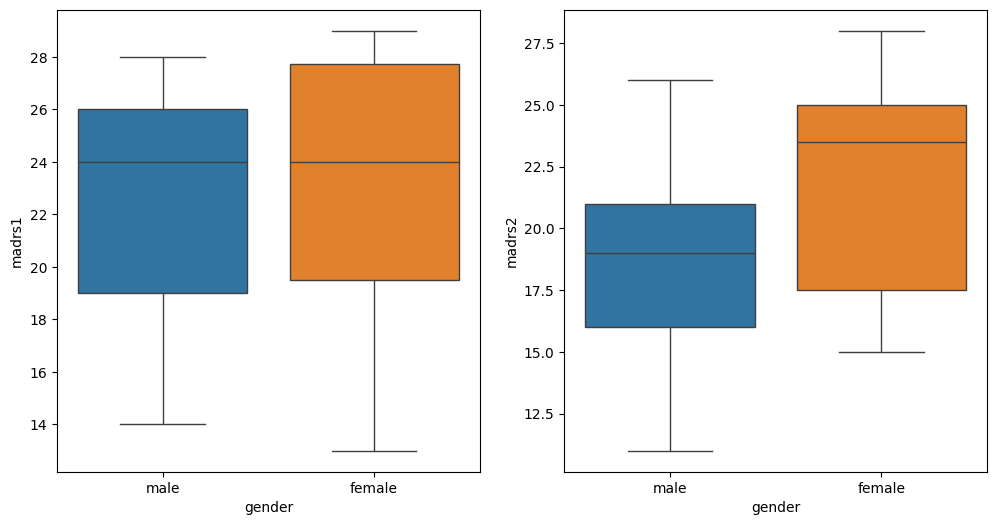

In [31]:

# By gender

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  #  two subplots

sns.boxplot(x="gender", y="madrs1", data=condition_df, ax=axes[0], hue='gender')  # Plot madrs1 on the first subplot
sns.boxplot(x="gender", y="madrs2", data=condition_df, ax=axes[1], hue='gender')  # Plot madrs2 on the second subplot

plt.show()




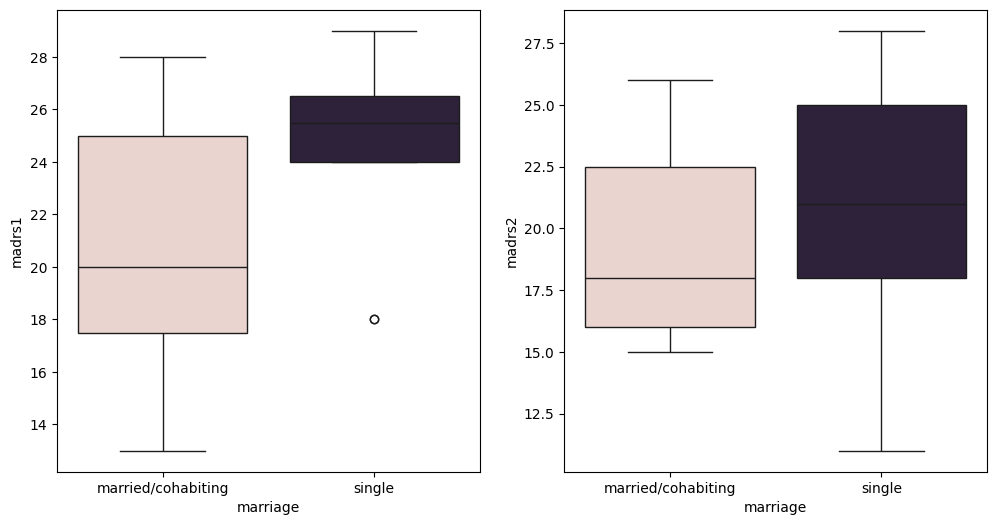

In [44]:
# By marriage

# mapping for marriage values
marriage_mapping = {1: 'married/cohabiting', 2: 'single'}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # two subplots

# hue mapping for the boxplot
sns.boxplot(x="marriage", y="madrs1", data=condition_df, ax=axes[0], hue="marriage", hue_order=marriage_mapping.keys())
sns.boxplot(x="marriage", y="madrs2", data=condition_df, ax=axes[1], hue="marriage", hue_order=marriage_mapping.keys())

# x-axis ticks and labels
axes[0].set_xticks(range(len(marriage_mapping)))
axes[0].set_xticklabels([marriage_mapping[label] for label in sorted(condition_df['marriage'].unique())])

axes[1].set_xticks(range(len(marriage_mapping)))
axes[1].set_xticklabels([marriage_mapping[label] for label in sorted(condition_df['marriage'].unique())])

# remove legend
axes[0].legend().set_visible(False)
axes[1].legend().set_visible(False)

plt.show()


**MADRS by afftype**

* recall - afftype:
    * 1 = bipolar II
    * 2 = unipolar depressive
    * 3 = bipolar I

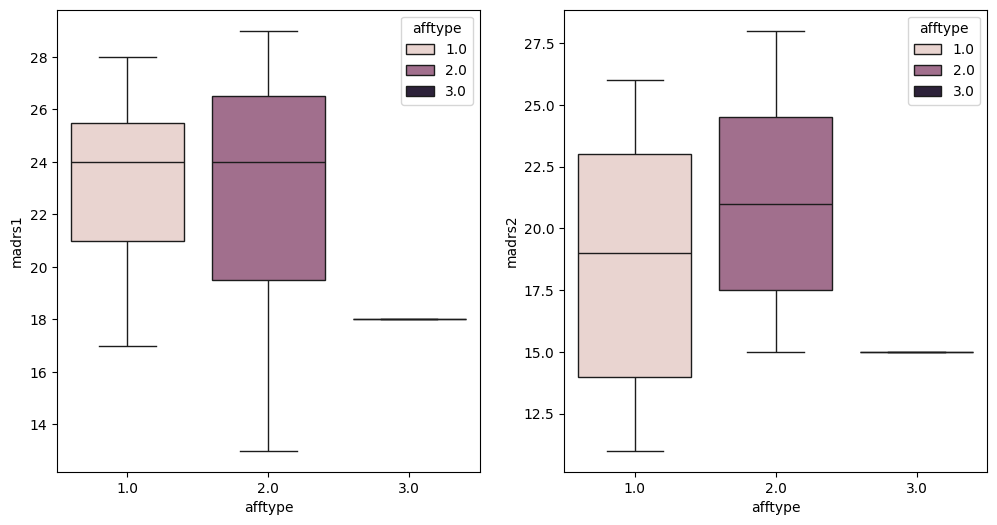

In [46]:

# By afftype
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  #  two subplots
sns.boxplot(x="afftype", y="madrs1", data=condition_df, ax=axes[0], hue='afftype')
sns.boxplot(x="afftype", y="madrs2", data=condition_df, ax=axes[1], hue='afftype')
plt.show()


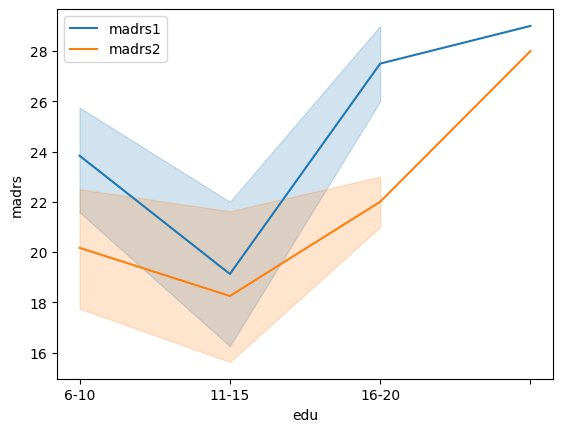

In [18]:
# madrs scores by education
sns.lineplot(data=condition_df, x='edu', y='madrs1', label='madrs1')
sns.lineplot(data=condition_df, x='edu', y='madrs2', label='madrs2')
plt.ylabel('madrs') # re-set y label
plt.legend()
plt.show()





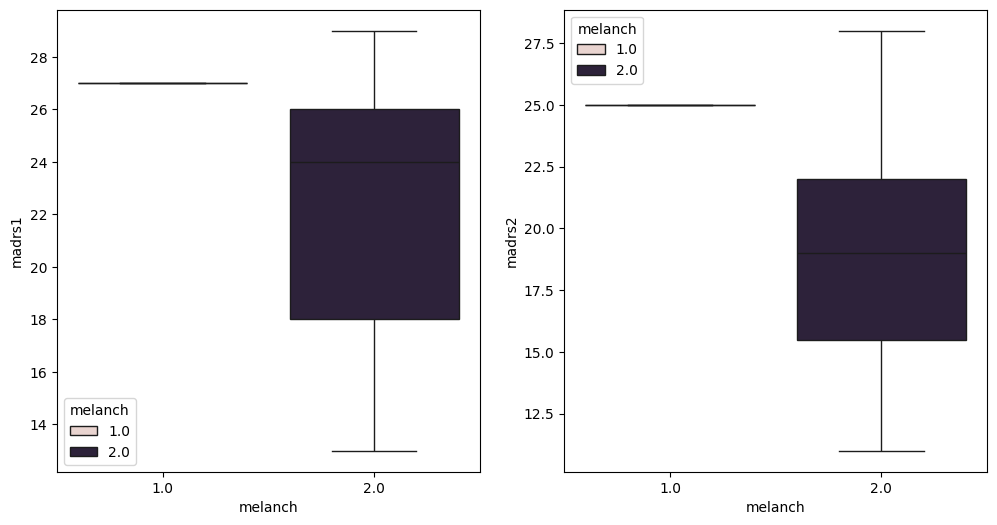

In [47]:

# By melanch
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots
sns.boxplot(x="melanch", y="madrs1", data=condition_df, ax=axes[0], hue='melanch')
sns.boxplot(x="melanch", y="madrs2", data=condition_df, ax=axes[1], hue='melanch')
plt.show()

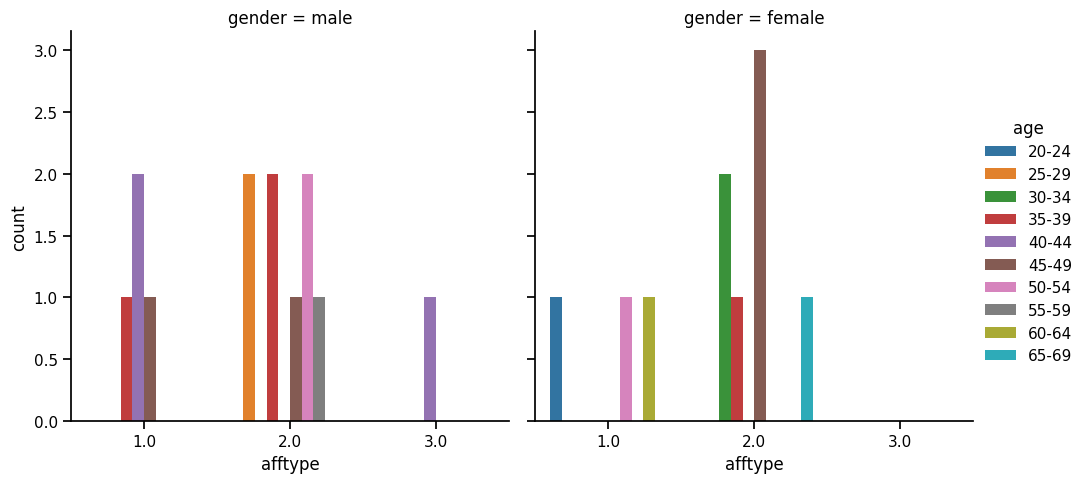

In [74]:

# afftype by gender, age
sns.catplot(x="afftype", col="gender", hue="age", kind="count", data=condition_df)
plt.show()

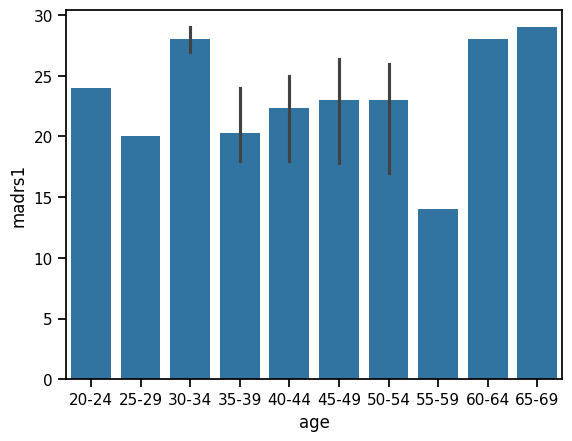

In [77]:
sns.barplot(x="age", y="madrs1", data=condition_df)
plt.show()

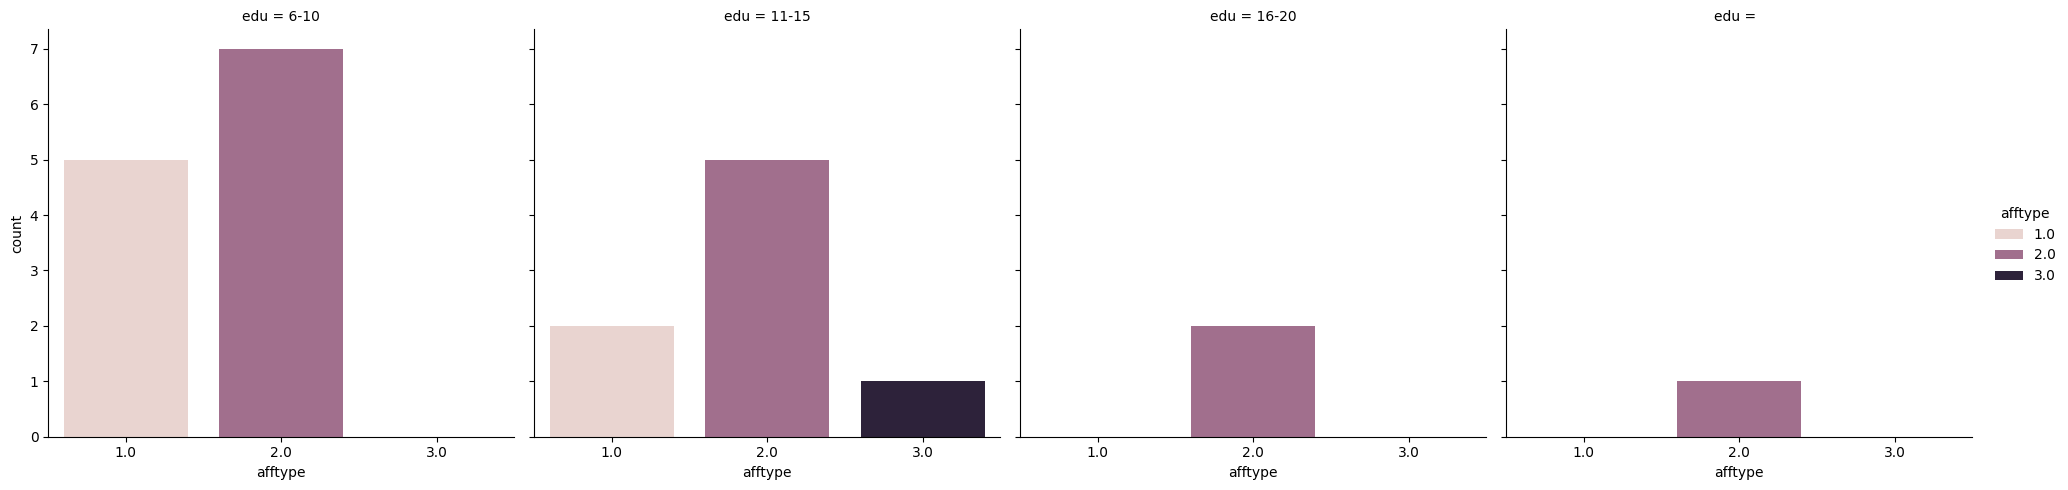

In [48]:
# afftype by educ
sns.catplot(x="afftype", col="edu", kind="count", data=condition_df, hue='afftype')
plt.show()